In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.metrics import classification_report, average_precision_score, plot_precision_recall_curve, plot_roc_curve
from sklearn.feature_selection import mutual_info_classif


#Importing models
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
original=pd.read_csv("creditcard.csv")
df=original.copy()
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

Text(0.5, 1.0, 'Distribution plot of Time Column')

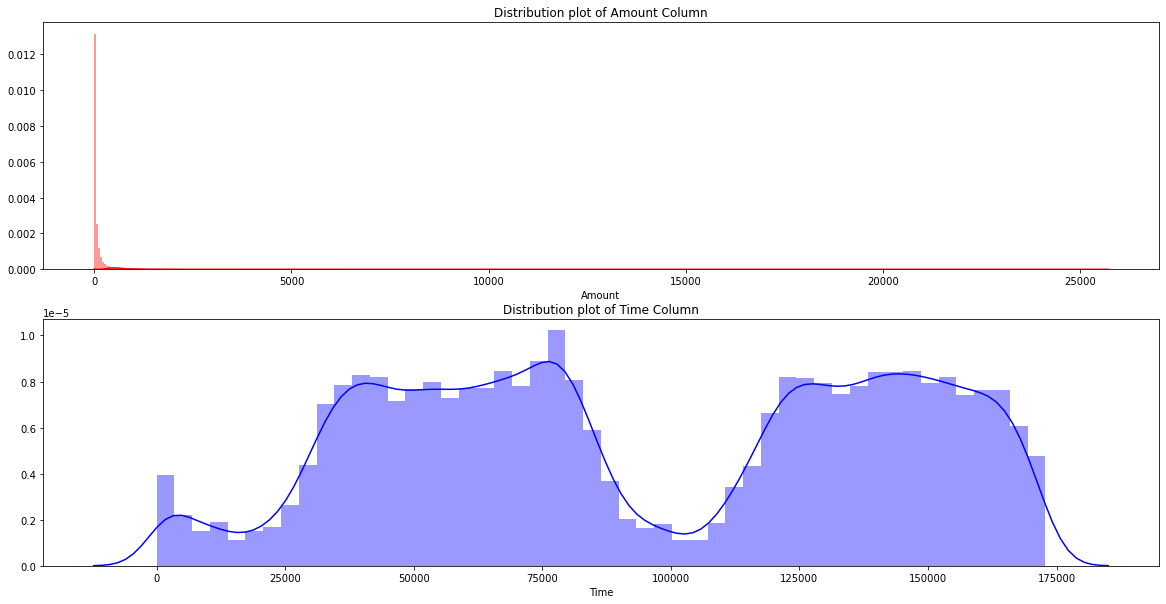

In [125]:
#Draw distribution plot for Time and Amount
fig, ax=plt.subplots(2,1, figsize=(20,10))
sns.distplot(df.Amount,bins=500, color='r', ax=ax[0]);
ax[0].set_title("Distribution plot of Amount Column")
sns.distplot(df.Time,bins=50, color='b',ax=ax[1]);
ax[1].set_title("Distribution plot of Time Column");

In [71]:
max(df.Time) # this is equivalent to 2 days almost so lets try to convert out time into hrs(total time period is 48 hrs)

172792.0

In [72]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [126]:
df.isna().sum() #Check if any values are missing--maybe there is a correlation with mssing values and fradulent activities

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

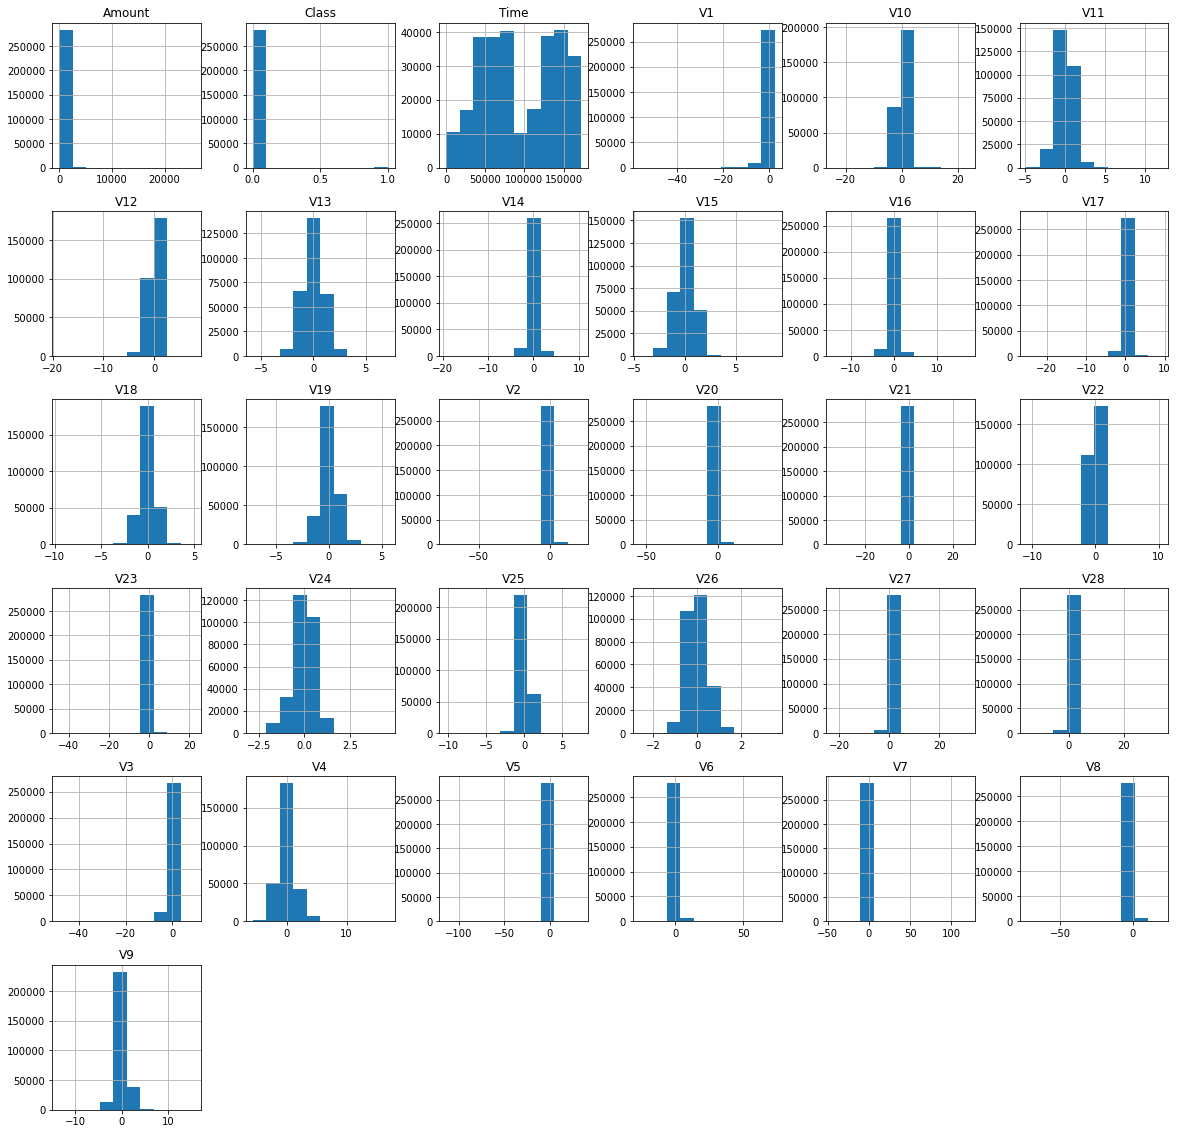

In [153]:
df.hist(figsize = (20, 20))
plt.show()

In [165]:
"""

#Lets convert the datetime object into correct year and month values

df['new_time'] = pd.to_datetime(df['Time'], unit='s')
df.new_time= df['new_time'].mask(df['new_time'].dt.year == 1970, 
                             df['new_time'] + pd.offsets.DateOffset(year=2013))
df.new_time= df['new_time'].mask(df['new_time'].dt.month == 1, 
                             df['new_time'] + pd.offsets.DateOffset(month=9))
df.new_time


#Lets break down time into its individual components

df["year"]=df.new_time.dt.year
df["month"]=df.new_time.dt.month
df["day"]=df.new_time.dt.day
df["hour"]=df.new_time.dt.hour
df["minute"]=df.new_time.dt.minute
df["second"]=df.new_time.dt.second
df.head()


df["tdelta"]=pd.to_timedelta(df["Time"], unit='s')
df.tdelta"""

C:\Users\adith\Anaconda3\envs\Project1\lib\site-packages\pandas\core\arrays\datetimes.py:694: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  PerformanceWarning,


0        2013-09-01 00:00:00
1        2013-09-01 00:00:00
2        2013-09-01 00:00:01
3        2013-09-01 00:00:01
4        2013-09-01 00:00:02
                 ...        
284802   2013-09-02 23:59:46
284803   2013-09-02 23:59:47
284804   2013-09-02 23:59:48
284805   2013-09-02 23:59:48
284806   2013-09-02 23:59:52
Name: new_time, Length: 284807, dtype: datetime64[ns]

In [167]:
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

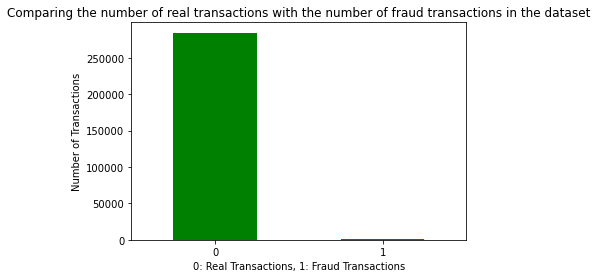

In [168]:
#Lets visualize this
df.Class.value_counts().plot(kind="bar", color=["Green", "Red"])
plt.xlabel("0: Real Transactions, 1: Fraud Transactions")
plt.ylabel("Number of Transactions")
plt.title("Comparing the number of real transactions with the number of fraud transactions in the dataset")
plt.xticks(rotation=0);

As you can see, the dataset is highly imbalanced which can significantly affect out ML model. A balanced dataset is best for training purposes

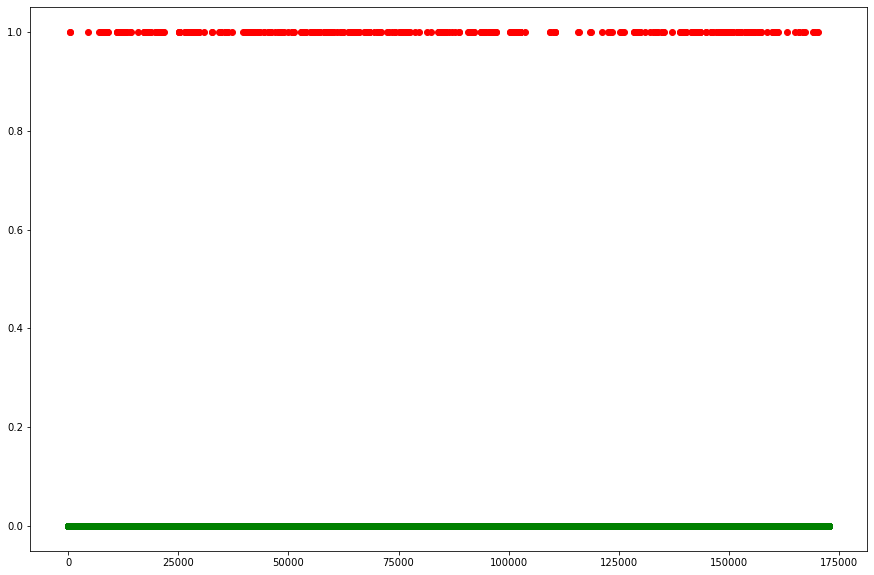

In [179]:
#See if the transactions occur at a given time period
plt.figure(figsize=(15,10))
plt.scatter(df.Time[df.Class==1], df.Class[df.Class==1], c="red")
plt.scatter(df.Time[df.Class==0], df.Class[df.Class==0], c="green");


There is no pattern for when the fraudulent activites occur. They happen at random

In [170]:
max(df.Amount[df.Class==1]), min(df.Amount[df.Class==0])

(2125.87, 0.0)

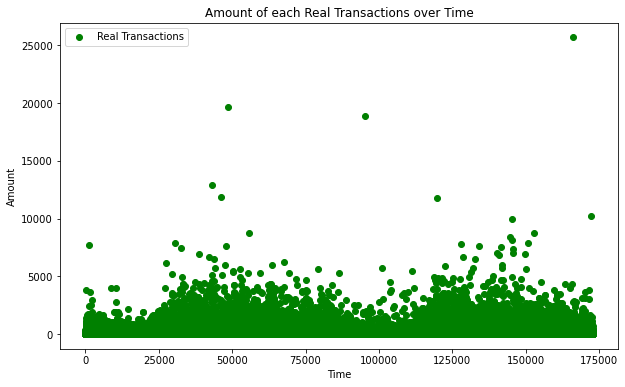

In [182]:
plt.figure(figsize=(10,6))
plt.scatter(df.Time[df.Class==0],df.Amount[df.Class==0], color=["green"])

plt.title("Transaction Amount of each Real Transactions over Time")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.legend(["Real Transactions"]);

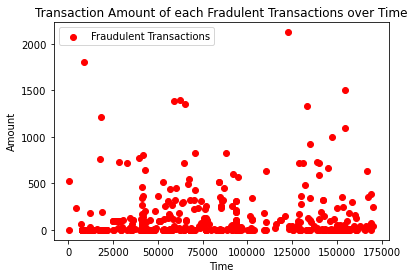

In [183]:
plt.scatter(df.Time[df.Class==1],df.Amount[df.Class==1], color=["red"])

plt.title("Transaction Amount of each Fradulent Transactions over Time")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.legend(["Fraudulent Transactions"]);

The Transaction amount for each fraudulent transaction is significantly lower compared to the Real transactions. This makes it a lot more difficult to detect fraud activities. The max amount is approxiamtely $2100

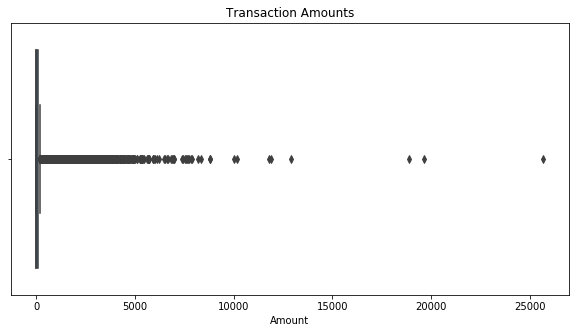

In [20]:
plt.figure(figsize=(10,5))
sns.boxplot(df["Amount"])
plt.title("Transaction Amounts");

In [21]:
df.Amount.skew()

16.977724453761024

The Amount is heavily right-skewed with a lot of outliers which we can fix using BoxCox transformation

# Lets look at the Mean and Standard Deviations for V1-V28 feature

In [31]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Let's visualize this

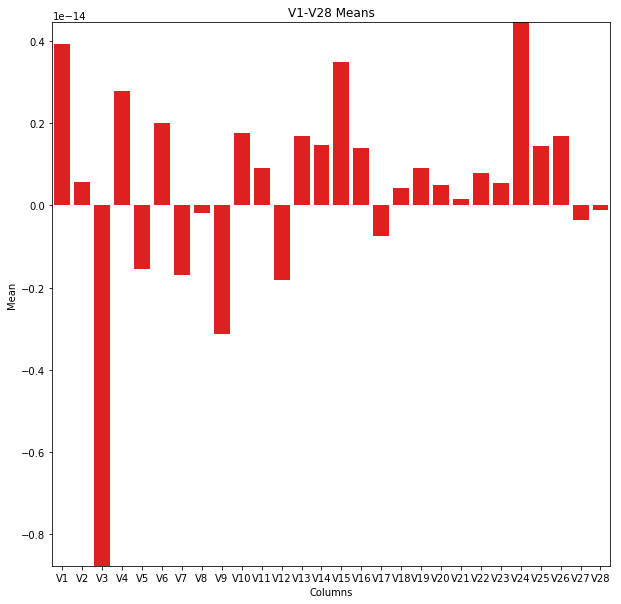

In [30]:
vs = df.drop(labels=["Time", "Amount","Class"], axis=1)

plt.figure(figsize=(10,10))
sns.barplot(x=vs.columns, y=vs.mean(), color="red")
plt.xlabel("Columns")
plt.ylabel("Mean")
plt.title("V1-V28 Means");

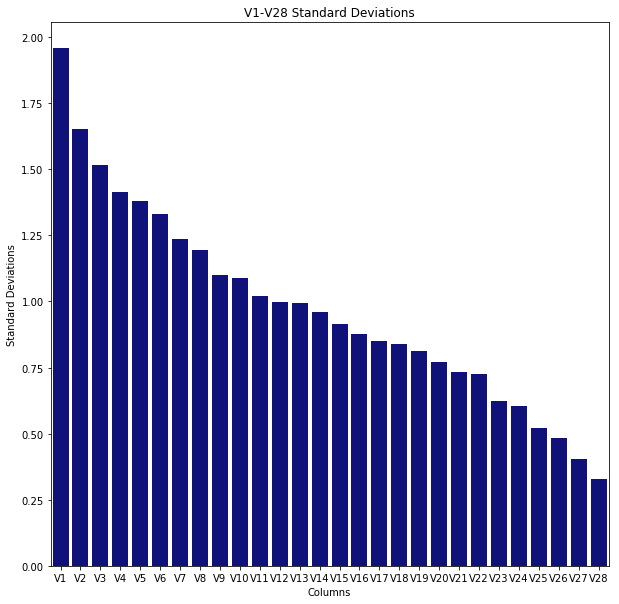

In [32]:
plt.figure(figsize=(10,10))
sns.barplot(x=vs.columns, y=vs.std(), color="darkblue")
plt.xlabel("Columns")
plt.ylabel("Standard Deviations")
plt.title("V1-V28 Standard Deviations");

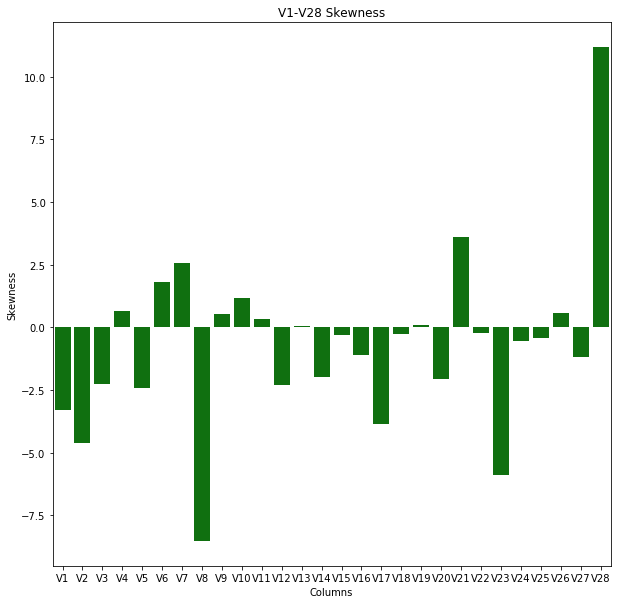

In [33]:
plt.figure(figsize=(10,10))
sns.barplot(x=vs.columns, y=vs.skew(), color="green")
plt.xlabel("Columns")
plt.ylabel("Skewness")
plt.title("V1-V28 Skewness");

# Correlation Matrix to see how each variable is related to each other and the target variable

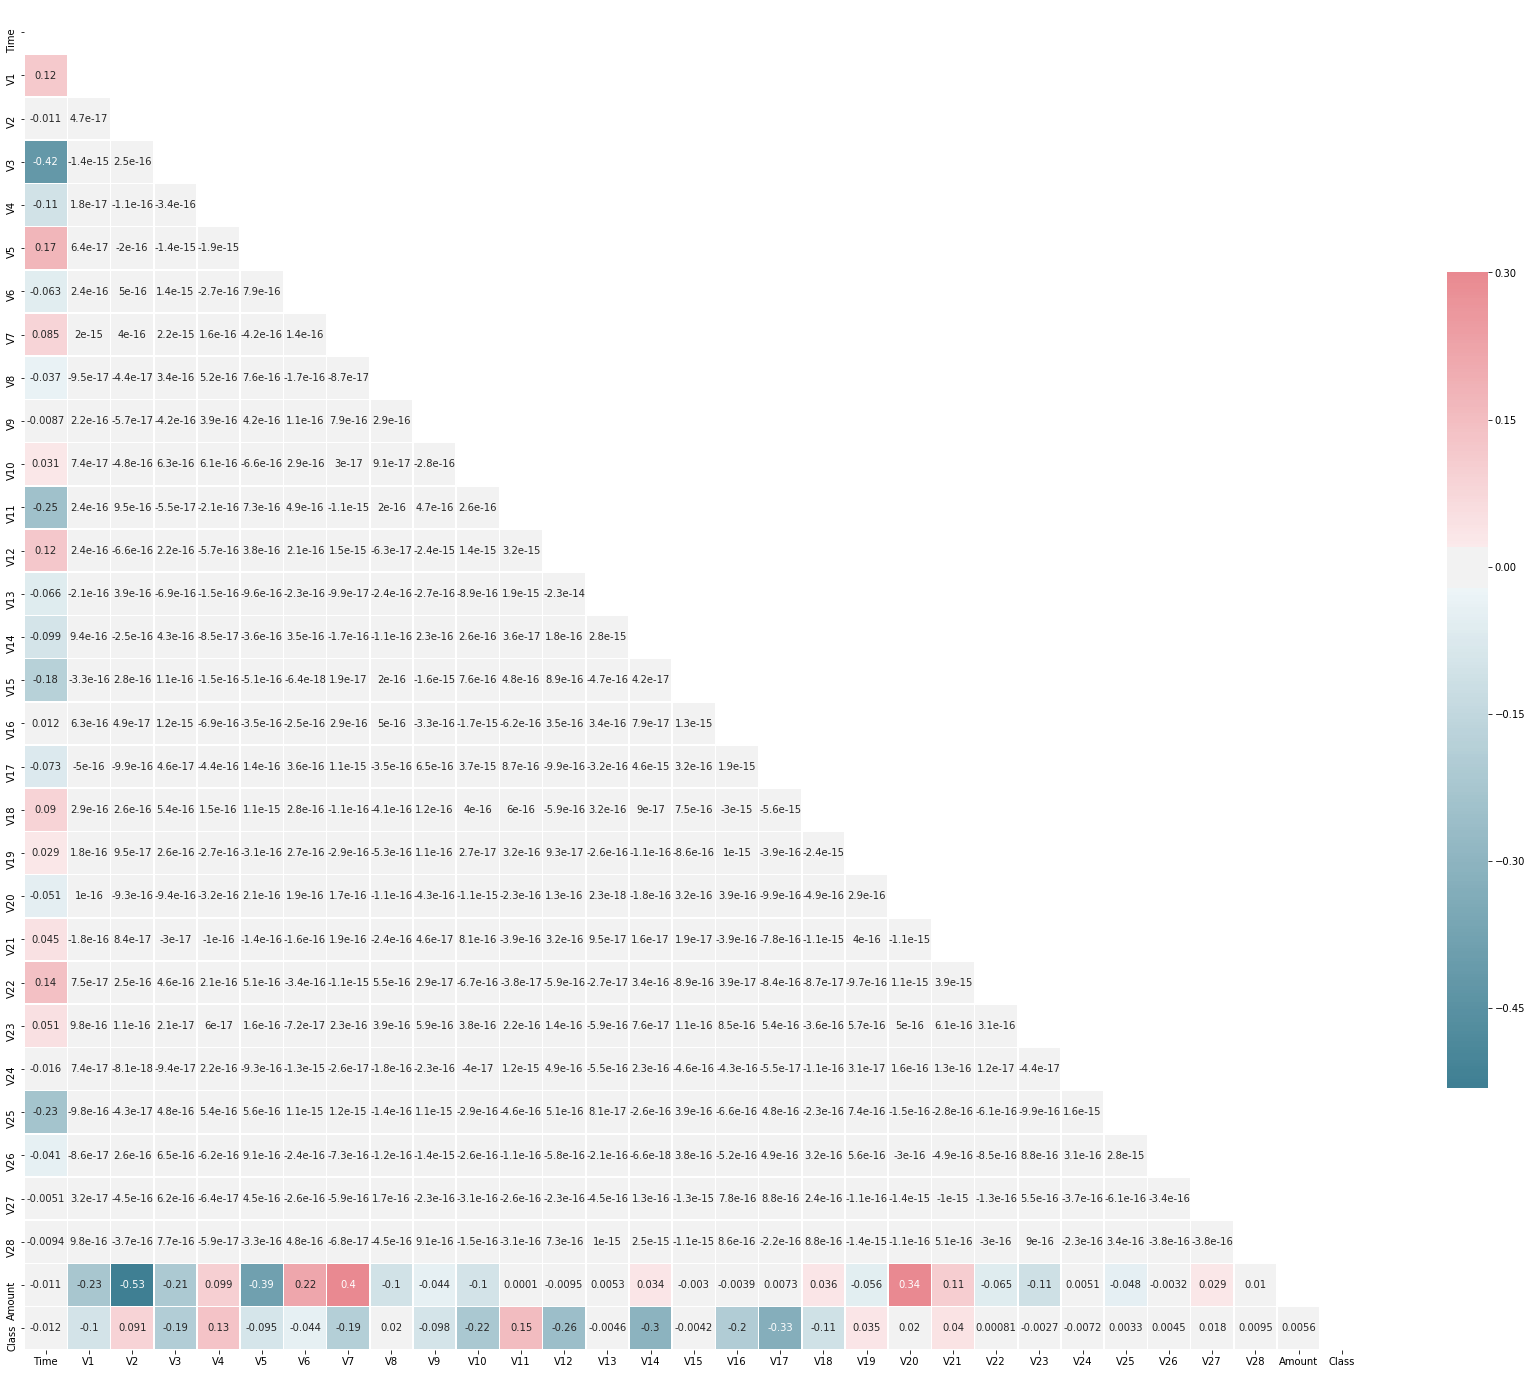

In [87]:
corr=df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 30))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

### Correlation matrix does not make sense. There is no correlation between the V# variables due to the PCA performed on the features. A correlation matrix only makes sense if the values are linear. Therefore, we are going to have to use other techniques to visualize and fit the data to the Machine Learning model

Lets use a mutual information to find the mutual dependence between two variables. It quantifies the "amount of information"  obtained about one random variable through observing the other random variable. This is a better method compared to correlation matrix

In [14]:
mutual_info=mutual_info_classif(X,y, random_state=42)
mutual_info

array([0.00193394, 0.00212666, 0.00322805, 0.00495368, 0.00497593,
       0.00238894, 0.0023878 , 0.00395065, 0.00189842, 0.00427669,
       0.00753036, 0.0068312 , 0.00760123, 0.00040847, 0.00813614,
       0.00031483, 0.0061444 , 0.00825807, 0.00431693, 0.00147245,
       0.00120666, 0.00245218, 0.00035319, 0.00076152, 0.00064199,
       0.00049961, 0.00049975, 0.00244407, 0.00187132, 0.00143969])

In [19]:
mutual_info_Series=pd.Series(mutual_info, index=X.columns)
mutual_info_Series.sort_values(ascending=False, inplace=True)
mutual_info_Series

V17       0.008258
V14       0.008136
V12       0.007601
V10       0.007530
V11       0.006831
V16       0.006144
V4        0.004976
V3        0.004954
V18       0.004317
V9        0.004277
V7        0.003951
V2        0.003228
V21       0.002452
V27       0.002444
V5        0.002389
V6        0.002388
V1        0.002127
Time      0.001934
V8        0.001898
V28       0.001871
V19       0.001472
Amount    0.001440
V20       0.001207
V23       0.000762
V24       0.000642
V26       0.000500
V25       0.000500
V13       0.000408
V22       0.000353
V15       0.000315
dtype: float64

Text(0.5, 0, 'Features')

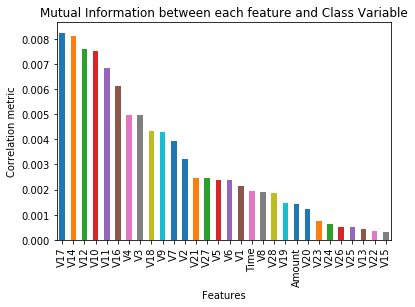

In [21]:
mutual_info_Series.plot.bar()
plt.title("Mutual Information between each feature and Class Variable")
plt.ylabel("Correlation metric")
plt.xlabel("Features")

In [3]:
X=df.drop("Class", axis=1)
y=df.Class
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((199364, 30), (85443, 30), (199364,), (85443,))

In [4]:
y_train.value_counts(), y_test.value_counts()

(0    199008
 1       356
 Name: Class, dtype: int64,
 0    85307
 1      136
 Name: Class, dtype: int64)

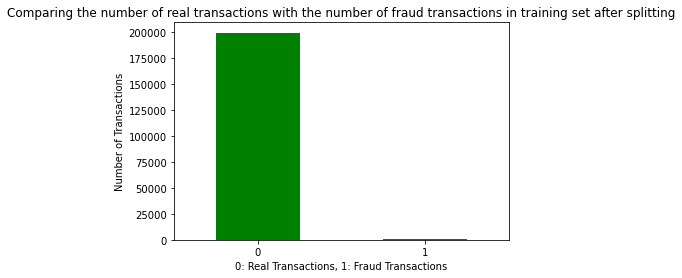

In [5]:
y_train.value_counts().plot(kind="bar", color=["Green", "Red"])
plt.xlabel("0: Real Transactions, 1: Fraud Transactions")
plt.ylabel("Number of Transactions")
plt.title("Comparing the number of real transactions with the number of fraud transactions in training set after splitting")
plt.xticks(rotation=0);

# StandardScaler

In [6]:
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)
X_train.shape, X_test.shape

((199364, 30), (85443, 30))

In [37]:
X_train[0]

array([ 1.02255459,  0.99785119, -0.22962626, -0.20738468,  0.23421529,
       -0.36779128, -0.0640219 , -0.50588871,  0.03060393,  0.95995457,
       -0.02686352,  0.61149957,  1.68999033,  1.26149805, -0.26397318,
       -0.36292946,  0.34942719, -1.09376318,  0.77802759,  0.20615616,
       -0.1625072 ,  0.32483903,  1.3366986 ,  0.08456891, -0.45980186,
       -0.08436785, -0.44894226,  0.11248883, -0.14374055, -0.30788875])

# RobustScaler

In [35]:
rs=RobustScaler()
X_train=rs.fit_transform(X_train)
X_test=rs.transform(X_test)
X_train.shape, X_test.shape

((227845, 30), (56962, 30))

# Lets do OverSampling to fix the imbalanced dataset

 Lets compare RandomOverSampler and SMOTE to see which yields better results

# RandomOverSamples

In [75]:
ros=RandomOverSampler(random_state=42)
X_train,y_train=ros.fit_sample(X_train,y_train)
X_train.shape, y_train.shape

((398016, 30), (398016,))

In [54]:
X_train, y_train

(array([[ 1.02255459,  0.99785119, -0.22962626, ...,  0.11248883,
         -0.14374055, -0.30788875],
        [ 0.47128275, -0.205221  , -0.37821992, ..., -0.92189789,
         -0.43984143, -0.1670264 ],
        [ 1.15338663,  0.03655821,  0.49556347, ...,  0.51372993,
          0.21235767, -0.30004345],
        ...,
        [-0.65730943, -0.32686323, -0.05143711, ..., -0.15412488,
         -0.19086876,  0.79119849],
        [ 0.84175242, -0.04114131,  1.94518722, ...,  1.66375214,
          1.80532513, -0.34315338],
        [-0.94354795, -0.79411014,  1.02294747, ...,  0.98360661,
          0.08319494,  1.0650779 ]]),
 array([0, 0, 0, ..., 1, 1, 1], dtype=int64))

# SMOTE

In [7]:
smote=SMOTE(random_state=42)
X_train, y_train=smote.fit_sample(X_train, y_train)
X_train.shape, y_train.shape

C:\Users\adith\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


((398016, 30), (398016,))

#### After trying out RandomOverSampler and SMOTE, SMOTE seems to be the better option. It produces a higher recall score but we lose a little bit of precision for the RandomForestClassifier. To be precise, we lose 4% on precision but make up 9% on recall. Therefore, I will choose to stick with SMOTE and then perform Hyperparameter Tuning using GridSearchCV or RandomSearchCV to see if I can improve the performance of the model a little bit

## Making sure that SMOTE is actually correctly balancing the dataset out

Text(0.5, 1.0, 'Count of "Class" feature in training set after SMOTE')

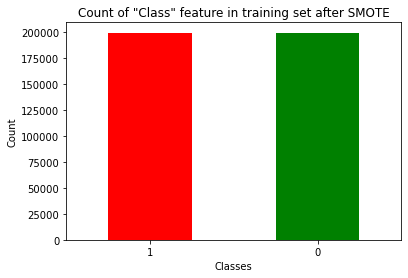

In [19]:
lol=pd.DataFrame(data=y_train, columns=["Class"])
lol.Class.value_counts().plot.bar(color=["Red", "Green"]);
plt.xlabel("Classes")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.title("Count of \"Class\" feature in training set after SMOTE")

# Modelling

In [20]:
models={"Logistic Regression":LogisticRegression(), 
        "SGDClassifier":SGDClassifier(),
        "RFC": RandomForestClassifier(), 
        "Decision Tree":DecisionTreeClassifier()}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given ML models
    
    models: dictionary of different Scikit-Learn ML models
    X_train: training data (no labels)
    X_test: test data (no labels)
    y_train: training data (target values)
    y_test: test data(predictions)
    """
    #Set random seed
    np.random.seed(42)
    
    #Make a dictionary to keep model scores
    model_scores={}
    
    #Loop through the models and fit the model to data
    for name, model in models.items():
        model.fit(X_train,y_train)
        model_scores[name]=model.score(X_test, y_test)
    
    return model_scores

In [21]:
model_scores=fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

C:\Users\adith\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\adith\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\adith\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


{'Logistic Regression': 0.9746146553842913,
 'SGDClassifier': 0.9633088725817212,
 'RFC': 0.9995084442259752,
 'Decision Tree': 0.9975773322565921}

# Model Comparison

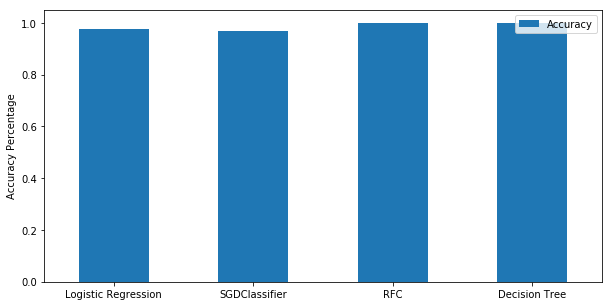

In [74]:
model_compare=pd.DataFrame(model_scores, index=["Accuracy"])
model_compare.T.plot.bar(figsize=(10,5)) 
plt.title("How well the model fit on the training set and then accuracy checked on test set")
plt.ylabel("Accuracy Percentage")
plt.xticks(rotation=0);

## Let's try out every model and see how accurate the predictions 

In [22]:
model=LogisticRegression()
model.fit(X_train,y_train)
y_preds=model.predict(X_test)
print(classification_report(y_test, y_preds))

C:\Users\adith\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

   micro avg       0.97      0.97      0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962



In [23]:
model=SGDClassifier()
model.fit(X_train,y_train)
y_preds=model.predict(X_test)
print(classification_report(y_test, y_preds))

C:\Users\adith\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.92      0.11        98

   micro avg       0.98      0.98      0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962



In [24]:
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
y_preds=model.predict(X_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.41      0.80      0.54        98

   micro avg       1.00      1.00      1.00     56962
   macro avg       0.70      0.90      0.77     56962
weighted avg       1.00      1.00      1.00     56962



In [8]:
model=RandomForestClassifier()
model.fit(X_train,y_train)
y_preds=model.predict(X_test)
y_preds_prob=model.predict_proba(X_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.84      0.88      0.86       136

    accuracy                           1.00     85443
   macro avg       0.92      0.94      0.93     85443
weighted avg       1.00      1.00      1.00     85443



In [38]:
print("AUPRC: "+ str(average_precision_score(y_test,y_preds)))

AUPRC: 0.7626391656577194


### According to the ML models I tried, RandomForest which is an ensemble learning method performs the best. So let us perform Hyperparameter tuning

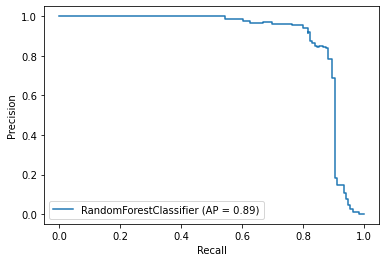

In [9]:
plot_precision_recall_curve(model,X_test,y_test)

# Lets Hyperparameter Tune to get a better performance from the RandomForestClassifier (GridSearchCV)

In [14]:
#Lets optimize the parameters for RandomForestClassifier using GridSearch
np.random.seed(42)
rf_grid={"n_estimators": np.arange(10,150,50),
        "max_depth":[5,10],
        "max_features":['auto', "log"],
        "min_samples_split": [2,4,10],
        "min_samples_leaf": [1,3,5]}

grid_search_model=GridSearchCV(RandomForestClassifier(), param_grid=rf_grid, n_jobs=-1, cv=3,verbose=True)
grid_search_model.fit(X_train,y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 16.5min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 48.9min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed: 83.4min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10], 'max_features': ['auto', 'log'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 4, 10],
                         'n_estimators': array([ 10,  60, 110])},
             verbose=True)

In [15]:
grid_search_model.best_params_  

{'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 110}

These lead to overfitting and significant drop in precision, so I am going to stick with few parameters(leave max_depth as Default)

In [25]:
#Lets create a RandomForestClassifier with the best hyperparameters
np.random.seed(42)
best_model=RandomForestClassifier(n_estimators=110, min_samples_leaf=2,min_samples_split=10)
best_model.fit(X_train,y_train)
y_preds=best_model.predict(X_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.81      0.88      0.84       136

    accuracy                           1.00     85443
   macro avg       0.90      0.94      0.92     85443
weighted avg       1.00      1.00      1.00     85443



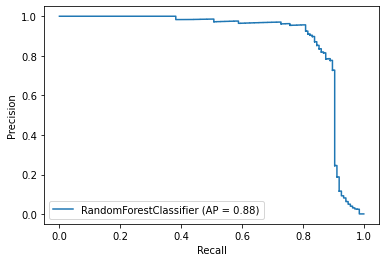

In [26]:
plot_precision_recall_curve(best_model,X_test,y_test)

## I need to continue to play with the hyperparameters until I get a better performance. But for now, this is satisfatory. If you have any questions, please feel free to message me :)